In [453]:
%matplotlib nbagg

In [454]:
import numpy as np
import matplotlib.pyplot as plt

In [455]:
size = 501
freq = 200
width = int(np.ceil(size / (size/2 - freq) * 2))
print(width)

20


In [456]:
f = np.ones(size)
f[:width] = -0.5*np.cos(np.pi*np.arange(width)/width) + 0.5
f[-width:] = 0.5*np.cos(np.pi*np.arange(width)/width) + 0.5

<IPython.core.display.Javascript object>


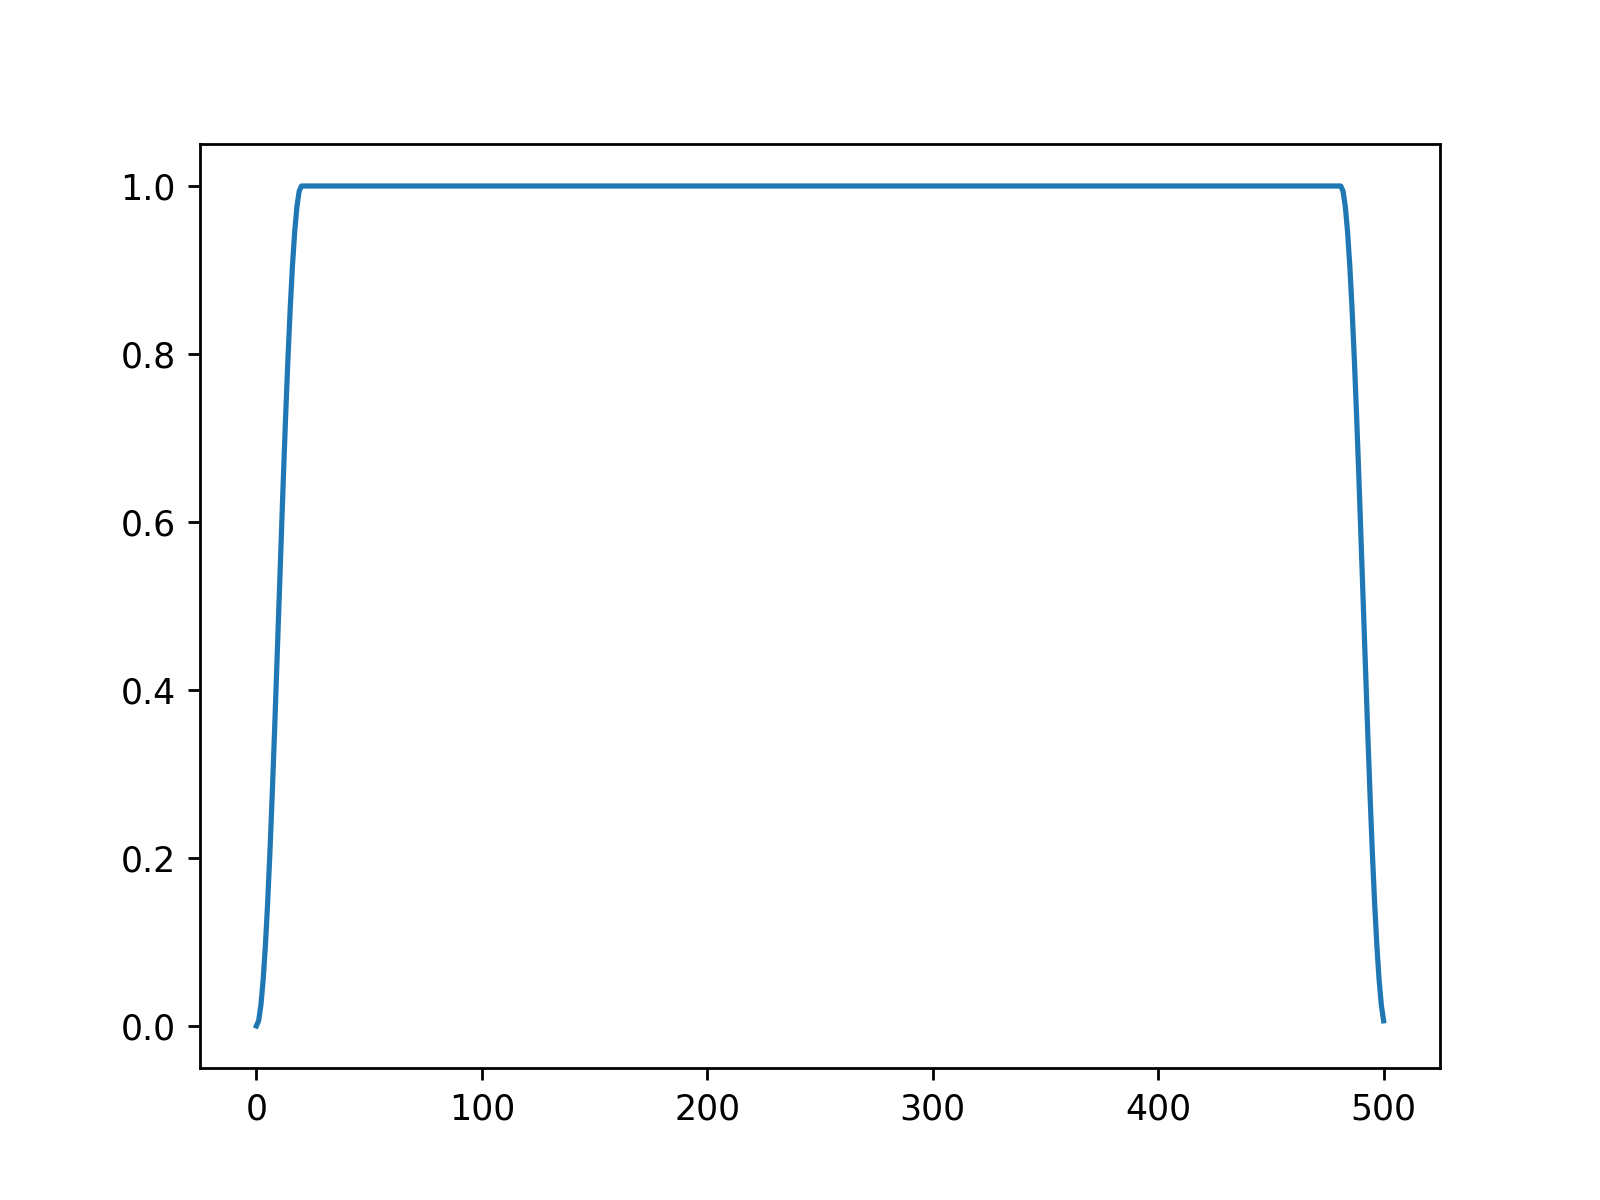

In [457]:
fig, axes = plt.subplots()
axes.plot(f)

<IPython.core.display.Javascript object>


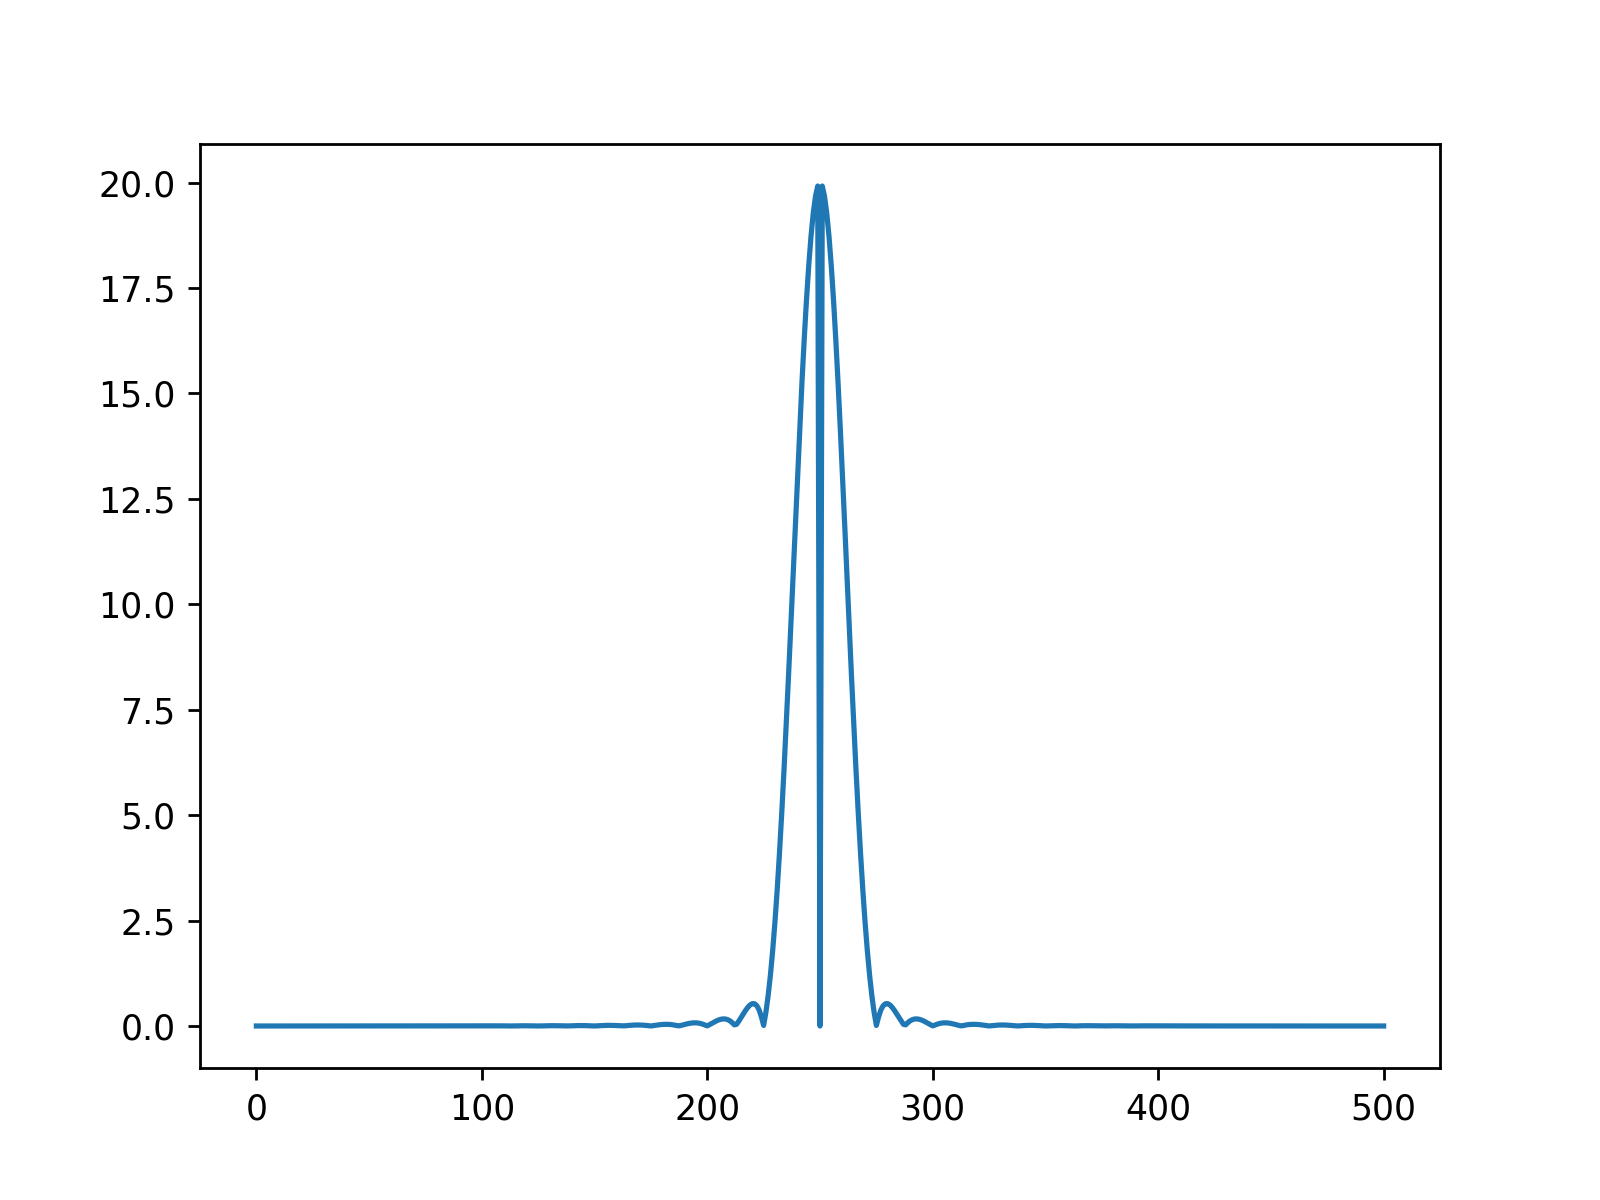

In [458]:
fig, axes = plt.subplots()
axes.plot(np.abs(np.fft.fftshift(np.fft.fft(f - np.mean(f)))))

In [459]:
real_func = np.random.random(size) - 0.5
real_func_fft = np.fft.fftshift(np.fft.fft(real_func))
real_func_bandpass_fft = real_func_fft.copy()
real_func_bandpass_fft[:freq] = 0
real_func_bandpass_fft[-freq:] = 0
real_func_bandpass = np.real(np.fft.ifft(np.fft.ifftshift(real_func_bandpass_fft)))

<IPython.core.display.Javascript object>


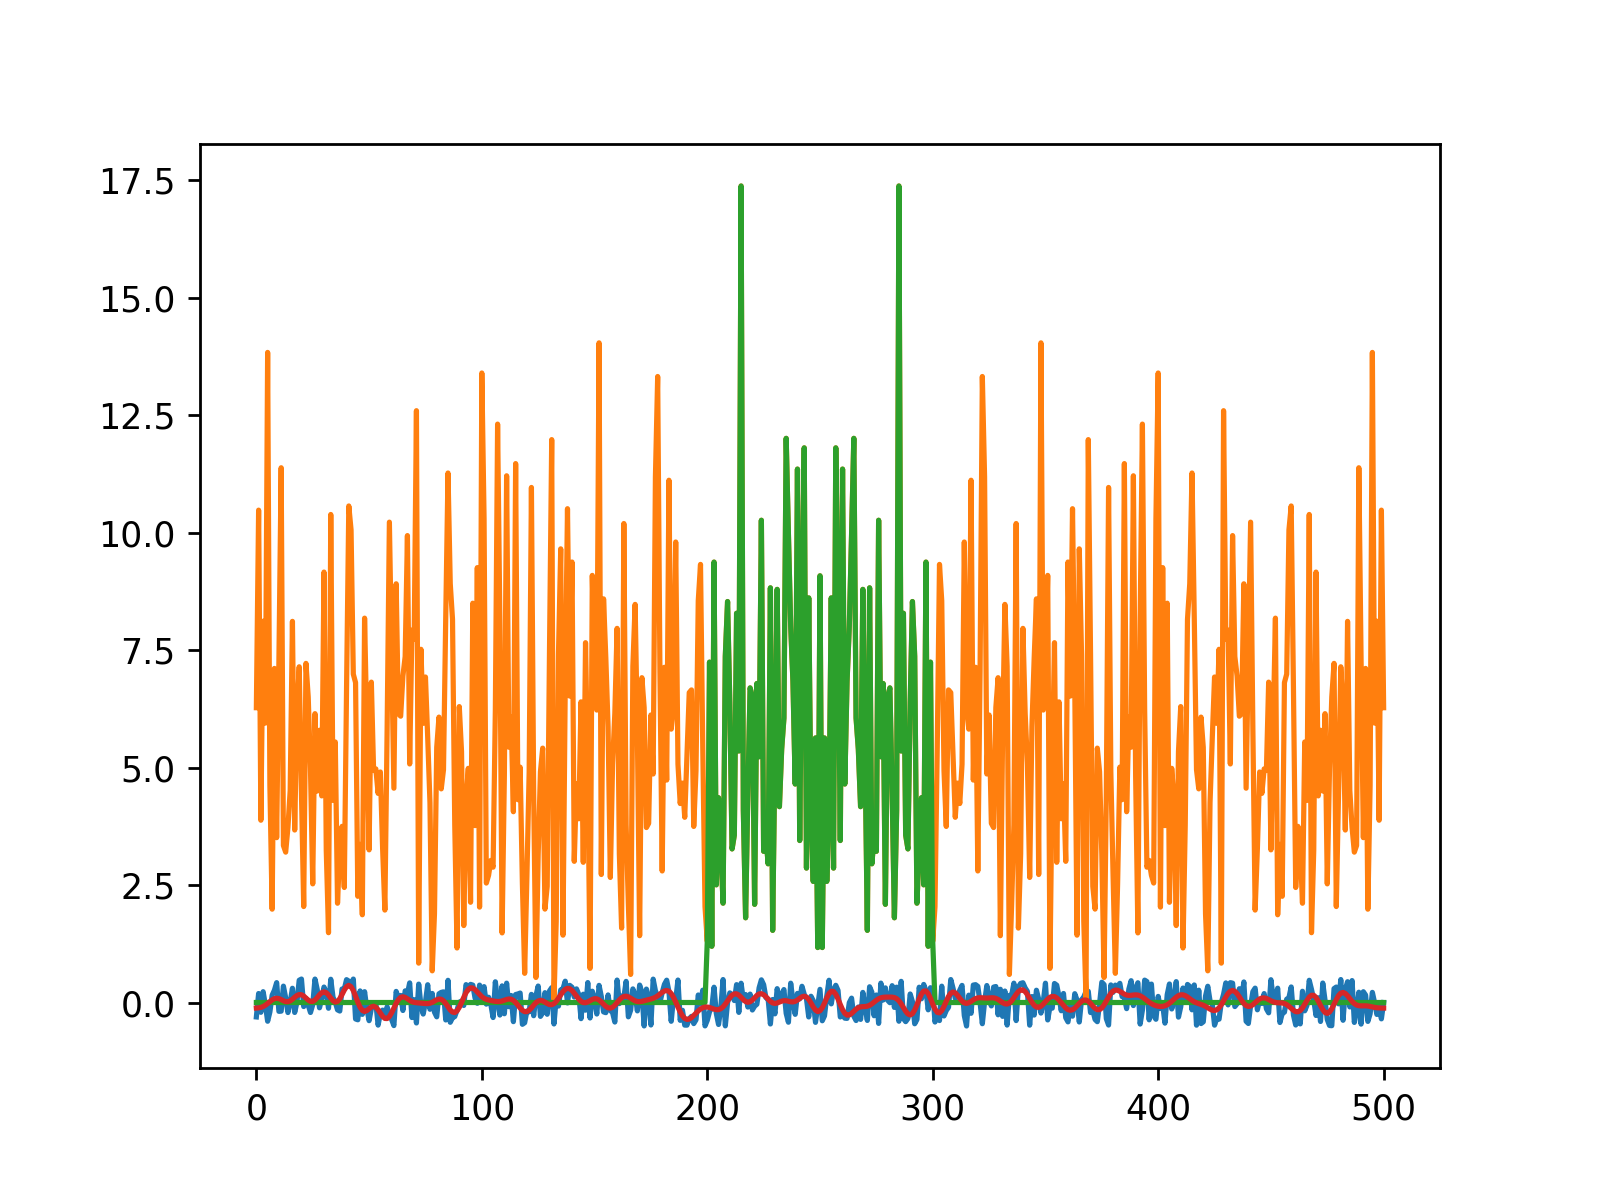

In [460]:
fig, axes = plt.subplots()
axes.plot(real_func)
axes.plot(np.abs(real_func_fft))
axes.plot(np.abs(real_func_bandpass_fft))
axes.plot(real_func_bandpass)

In [461]:
real_func_skewed = real_func_bandpass + np.linspace(-10, 10, size)
real_func_skewed_fft = np.fft.fftshift(np.fft.fft(real_func_skewed))
real_func_skewed_fft_filtered = real_func_skewed_fft.copy()
real_func_skewed_fft_filtered[:freq] = 0
real_func_skewed_fft_filtered[-freq:] = 0
real_func_skewed_restored = np.real(np.fft.ifft(np.fft.ifftshift(real_func_skewed_fft_filtered)))

<IPython.core.display.Javascript object>


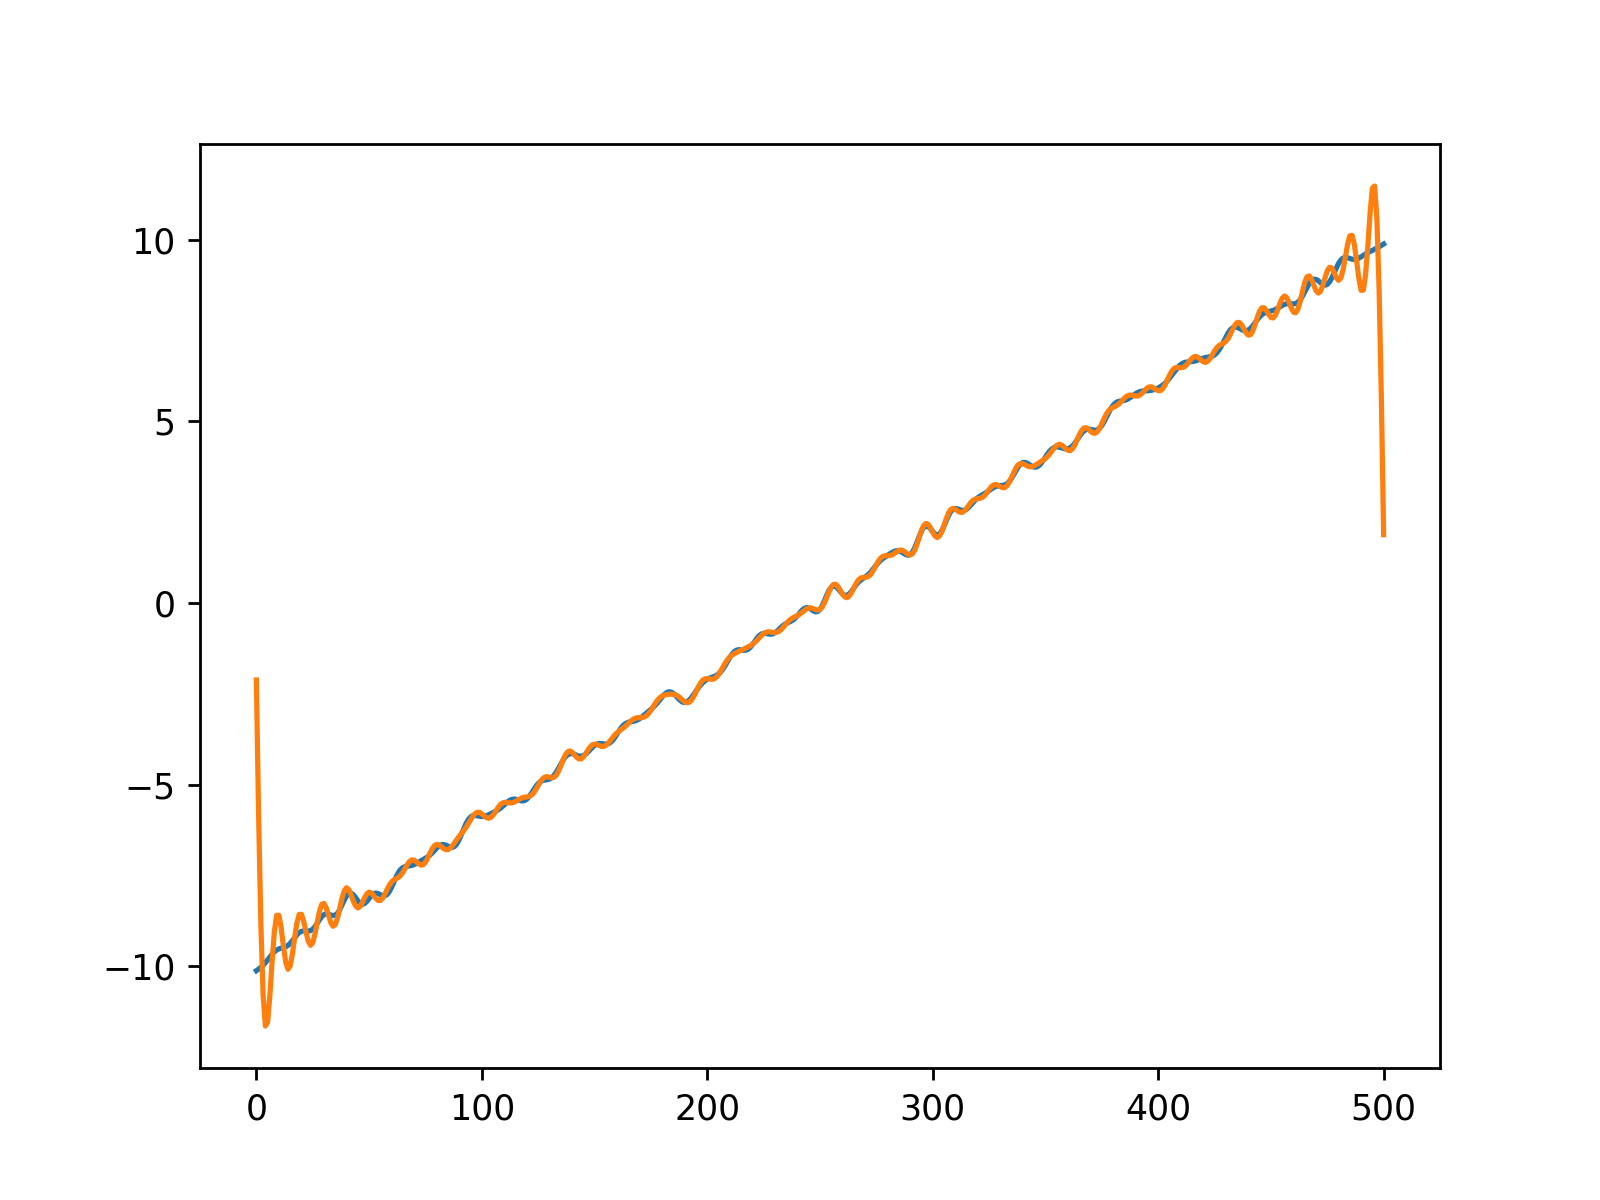

In [462]:
fig, axes = plt.subplots()
axes.plot(real_func_skewed)
axes.plot(real_func_skewed_restored)

In [463]:
real_func_damped = real_func_skewed * f
real_func_damped_fft = np.fft.fftshift(np.fft.fft(real_func_damped))
real_func_damped_fft_filtered = real_func_damped_fft.copy()
real_func_damped_fft_filtered[:freq] = 0
real_func_damped_fft_filtered[-freq:] = 0
real_func_restored = np.real(np.fft.ifft(np.fft.ifftshift(real_func_damped_fft_filtered)))

<IPython.core.display.Javascript object>


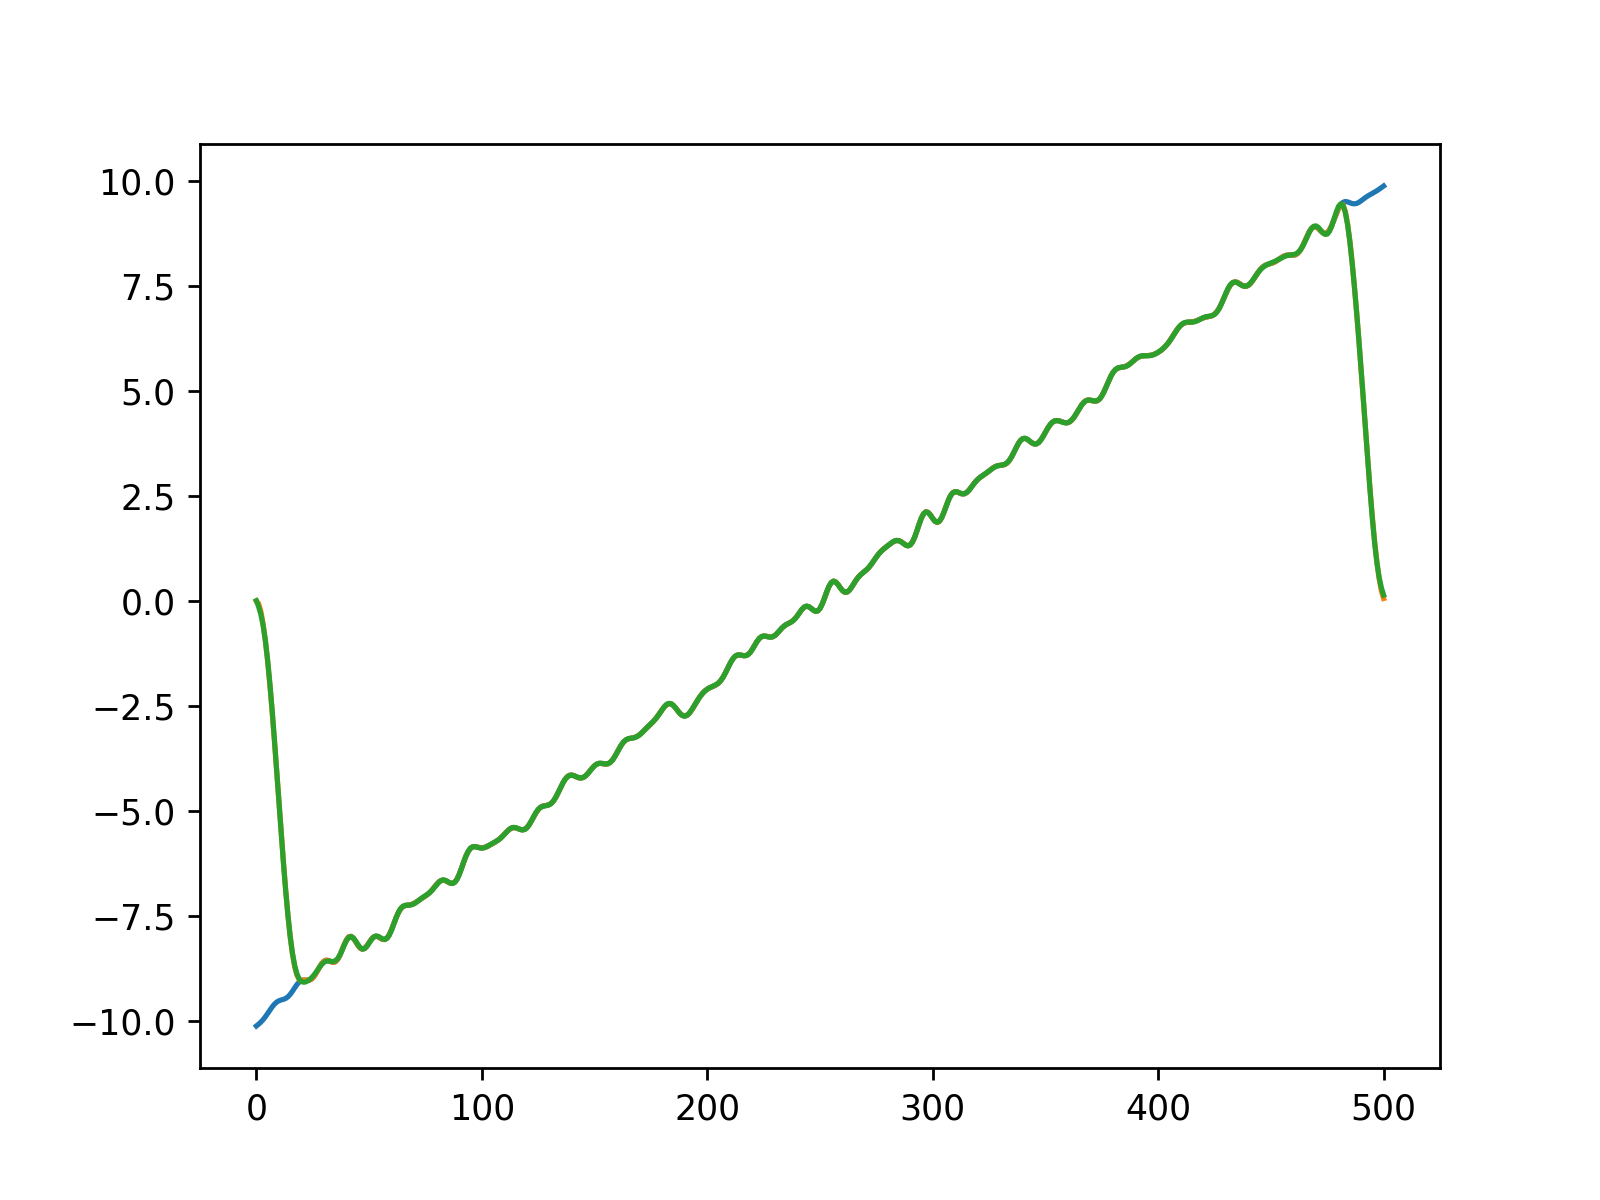

In [464]:
fig, axes = plt.subplots()
axes.plot(real_func_skewed)
axes.plot(real_func_damped)
axes.plot(real_func_restored)
# axes.plot((real_func_restored - real_func_damped)[width:-width])

<IPython.core.display.Javascript object>


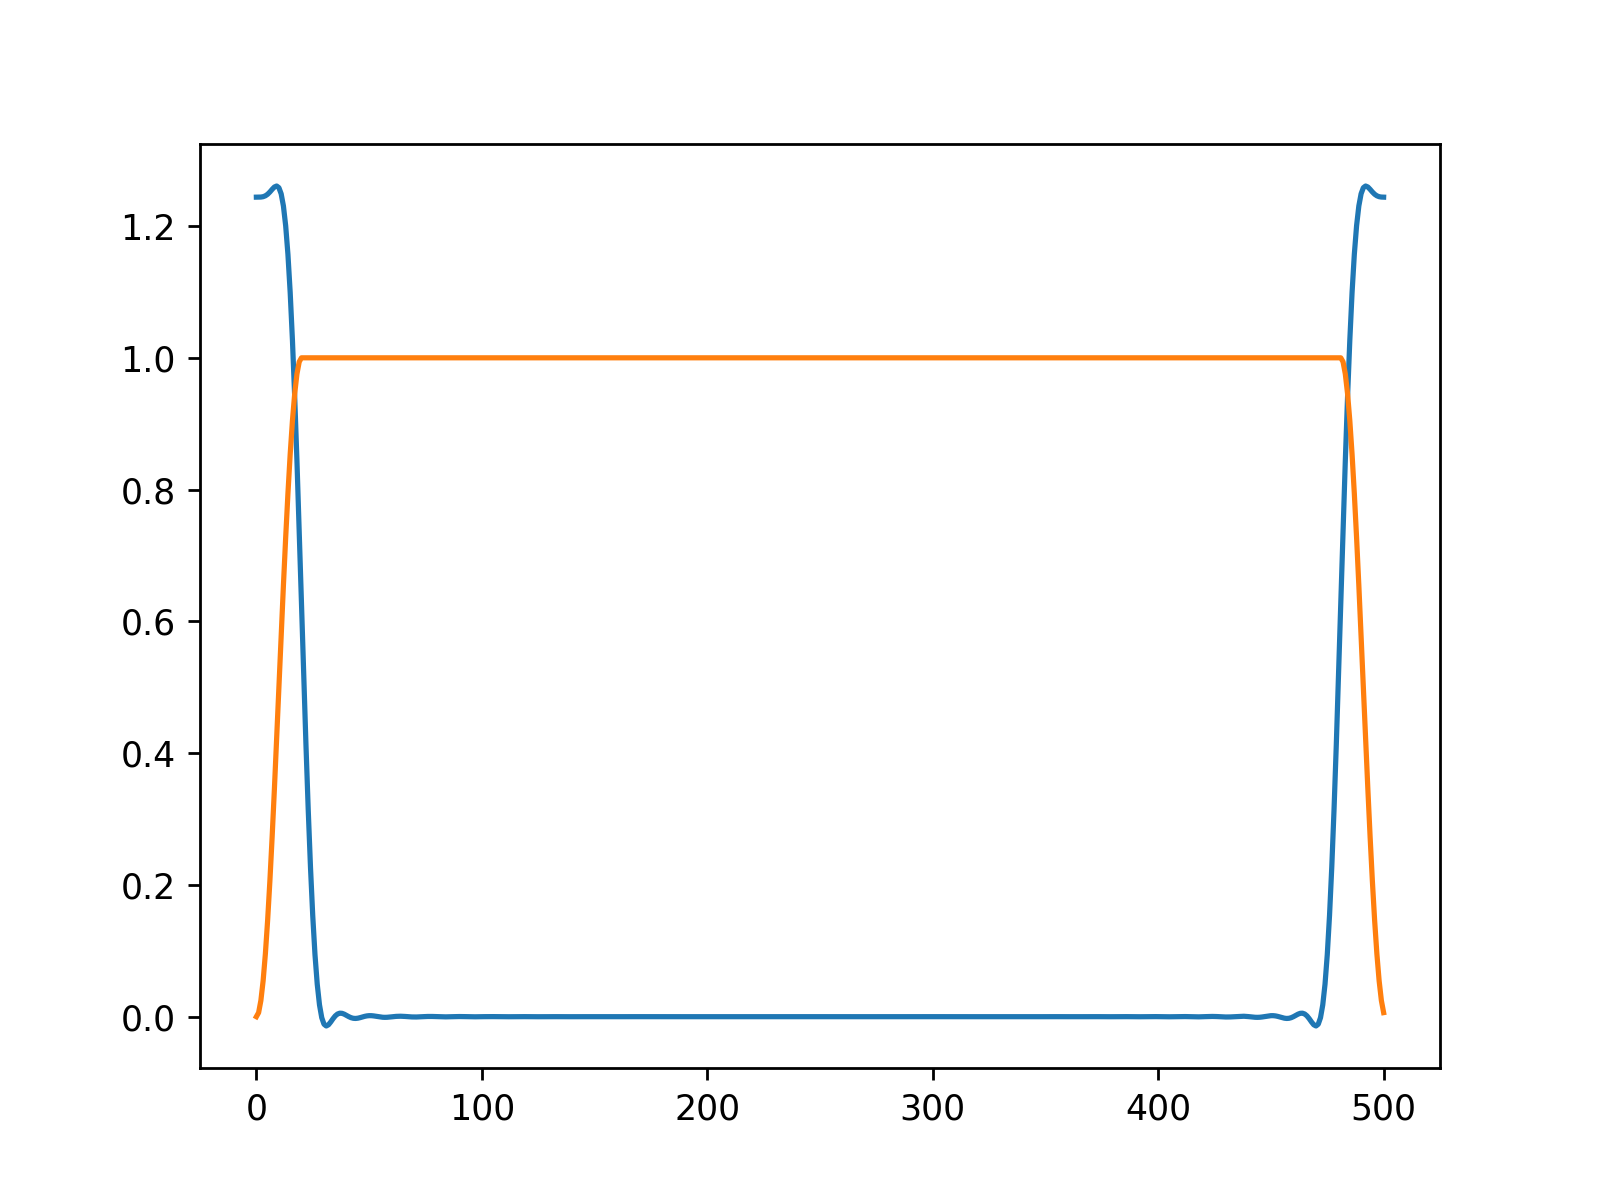

In [486]:
fig, axes = plt.subplots()
samples = np.linspace(-width, width, 501)
lanczos = np.sinc(samples)*np.sinc(samples / 3)
lanczos[np.abs(samples) > 3] = 0
#axes.plot(np.abs(lanczos*50))
axes.plot(np.real(np.fft.ifft(np.fft.ifftshift(lanczos))*50))
axes.plot(f)
#axes.plot(np.abs(np.fft.fftshift(np.fft.fft(f))))

<IPython.core.display.Javascript object>


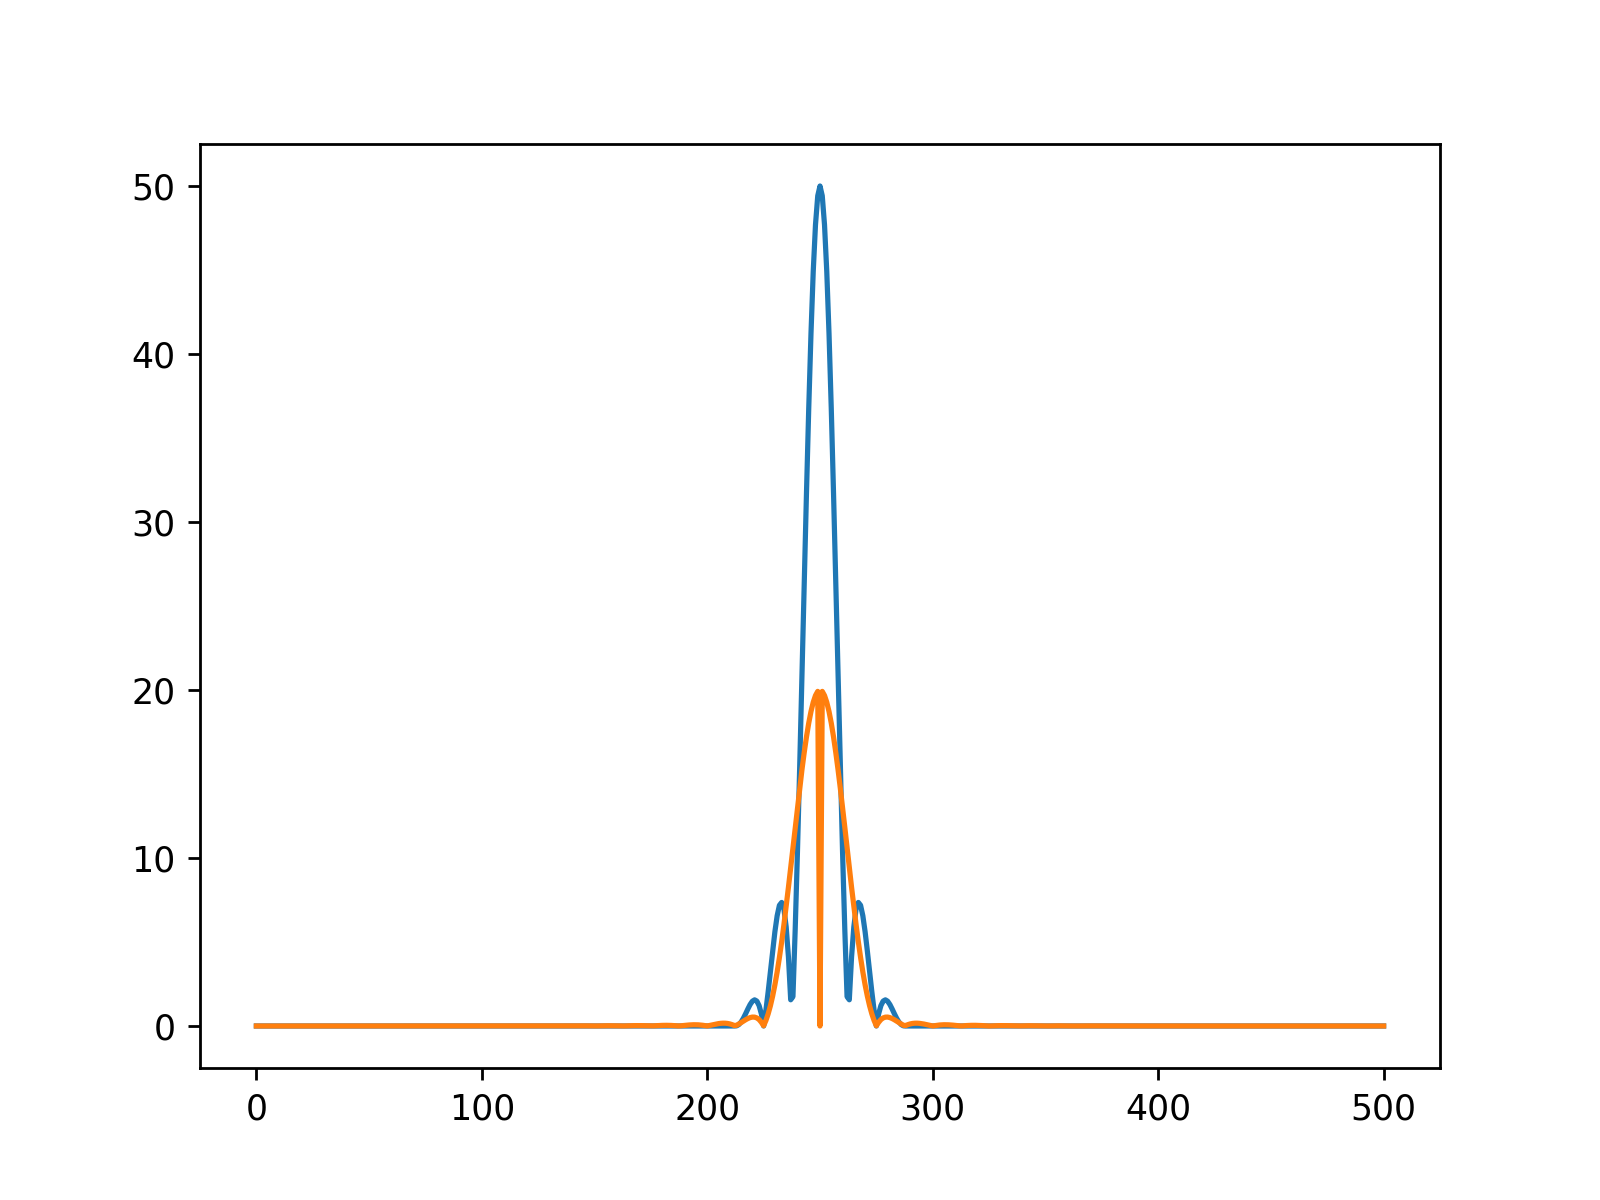

In [487]:
fig, axes = plt.subplots()
axes.plot(np.abs(lanczos*50))
axes.plot(np.abs(np.fft.fftshift(np.fft.fft(f - np.mean(f)))))